<a href="https://colab.research.google.com/github/sense64/data_viz/blob/main/h_clustering_prg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris() #iris 데이터를 불러옴

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']
data['target'] = pd.DataFrame(iris.target)
print(data.head())

   Sepal length  Sepal width  Petal length  Petal width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [ ]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram #병합모듈, 데드로그램 모듈을 가지고 옴
import matplotlib.pyplot as plt

mergings = linkage(data,method='ward') #병합방법 ward

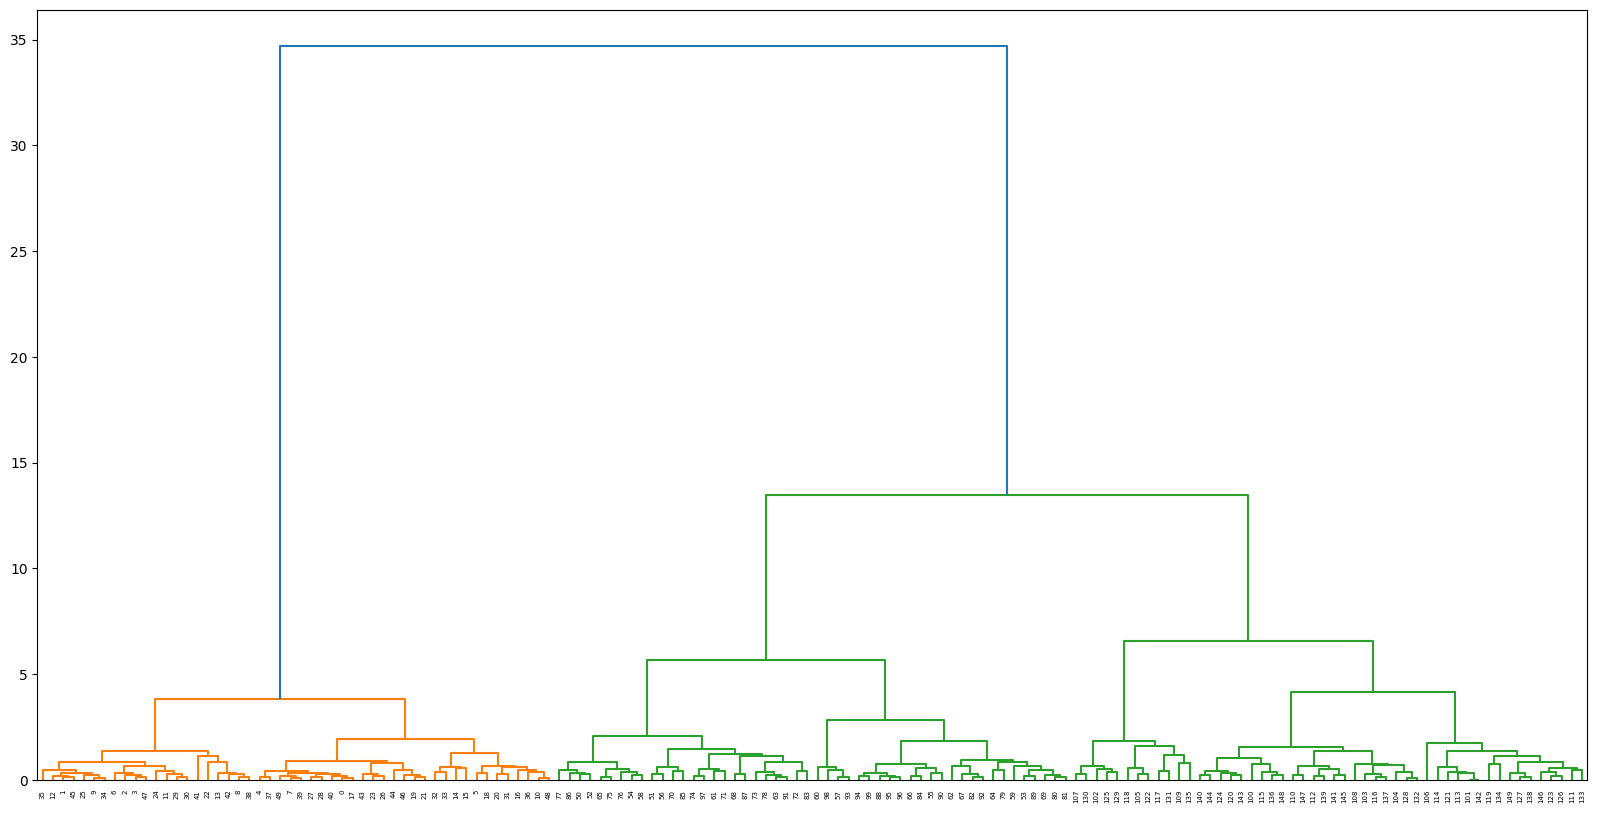

In [ ]:
plt.figure(figsize=(20,10))
dendrogram(mergings)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

data['cus'] = pd.DataFrame(fcluster(mergings,3, criterion='distance'))
print(data.head())

   Sepal length  Sepal width  Petal length  Petal width  target  cus
0           5.1          3.5           1.4          0.2       0    1
1           4.9          3.0           1.4          0.2       0    1
2           4.7          3.2           1.3          0.2       0    1
3           4.6          3.1           1.5          0.2       0    1
4           5.0          3.6           1.4          0.2       0    1


In [ ]:
print(data['cus'].unique())

[1 3 2]


In [8]:
#K-Means() 군집
from sklearn.cluster import KMeans #KMeans 모듈 가져옴
import matplotlib.pyplot  as plt
import seaborn as sns

# create model and prediction

model = KMeans(n_clusters=3,algorithm='auto') #군집수 지정(가장 중요함)

model.fit(data) #모델설정

predict = pd.DataFrame(model.predict(data)) #군집을 예측

predict.columns=['cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


In [9]:
data_result = pd.concat([data,predict],axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

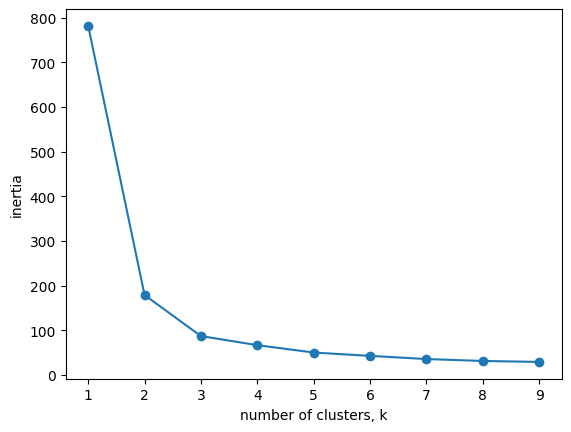

In [10]:
ks = range(1,10)

inertias = []



for k in ks:

    model = KMeans(n_clusters=k)

    model.fit(data)

    inertias.append(model.inertia_)


# Plot ks vs inertias

plt.plot(ks, inertias, '-o')

plt.xlabel('number of clusters, k')

plt.ylabel('inertia')

plt.xticks(ks)

plt.show()

In [11]:
print(data_result.head())

   Sepal length  Sepal width  Petal length  Petal width  target  cluster
0           5.1          3.5           1.4          0.2       0        1
1           4.9          3.0           1.4          0.2       0        1
2           4.7          3.2           1.3          0.2       0        1
3           4.6          3.1           1.5          0.2       0        1
4           5.0          3.6           1.4          0.2       0        1
